In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB



In [8]:
# Assuming you've already loaded and preprocessed your DataFrame
file_path = r'C:\Users\Gunar Sindhwani\Documents\PROJECT1_MACHINELEARNING\combinedcsv.csv'
df = pd.read_csv(file_path)


In [9]:
target = df['malicious']
df = df.drop(columns=['malicious', 'md5_hash'])

# Standardize the data (recommended for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(pca_result, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
param_grid_logistic = {
    'C': [1],  # Regularization strength
    'penalty': ['l1'],
    'solver': ['liblinear']  # Solver that supports L1 penalty
}

In [17]:
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy', verbose=2, n_jobs=2)
grid_search_logistic.fit(X_train, y_train)

# Use the best estimator to identify important features
best_logistic = grid_search_logistic.best_estimator_
important_features = np.where(best_logistic.coef_[0] != 0)[0]

# Select only the important features for the Random Forest model
X_train_selected = X_train[:, important_features]
X_valid_selected = X_valid[:, important_features]  # Corrected line
X_test_selected = X_test[:, important_features]


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [18]:
# Save selected features into separate CSV files
df_X_train_selected = pd.DataFrame(X_train_selected, columns=[f'feature_{i}' for i in range(X_train_selected.shape[1])])
df_X_train_selected.to_csv('X_train_selected.csv', index=False)

df_X_val_selected = pd.DataFrame(X_valid_selected, columns=[f'feature_{i}' for i in range(X_valid_selected.shape[1])])
df_X_val_selected.to_csv('X_valid_selected.csv', index=False)

df_X_test_selected = pd.DataFrame(X_test_selected, columns=[f'feature_{i}' for i in range(X_test_selected.shape[1])])
df_X_test_selected.to_csv('X_test_selected.csv', index=False)


### GAUSSIAN NAIVE BAYES

In [30]:

# Gaussian Naive Bayes
gnb = GaussianNB()

# Training on selected features
gnb.fit(X_train_selected, y_train)

# Predictions on the training set
train_preds = gnb.predict(X_train_selected)

# Predictions on the validation set
val_preds = gnb.predict(X_valid_selected)

# Predictions on the test set
test_preds = gnb.predict(X_test_selected)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Confusion matrices
train_cm = confusion_matrix(y_train, train_preds)
val_cm = confusion_matrix(y_val, val_preds)
test_cm = confusion_matrix(y_test, test_preds)

# Classification reports
train_classification_report = classification_report(y_train, train_preds)
val_classification_report = classification_report(y_val, val_preds)
test_classification_report = classification_report(y_test, test_preds)

# Print scores and reports
print("Training Accuracy (Gaussian NB):", train_accuracy)
print("Validation Accuracy (Gaussian NB):", val_accuracy)
print("Testing Accuracy (Gaussian NB):", test_accuracy)

print("\nConfusion Matrix (Training - Gaussian NB):\n", train_cm)
print("\nConfusion Matrix (Validation - Gaussian NB):\n", val_cm)
print("\nConfusion Matrix (Testing - Gaussian NB):\n", test_cm)

print("\nClassification Report (Training - Gaussian NB):\n", train_classification_report)
print("\nClassification Report (Validation - Gaussian NB):\n", val_classification_report)
print("\nClassification Report (Testing - Gaussian NB):\n", test_classification_report)


Training Accuracy (Gaussian NB): 0.6148133157947991
Validation Accuracy (Gaussian NB): 0.609505595693441
Testing Accuracy (Gaussian NB): 0.6145892351274788

Confusion Matrix (Training - Gaussian NB):
 [[ 5836 16437]
 [ 2597 24545]]

Confusion Matrix (Validation - Gaussian NB):
 [[1668 4776]
 [ 737 6937]]

Confusion Matrix (Testing - Gaussian NB):
 [[ 799 2358]
 [ 363 3540]]

Classification Report (Training - Gaussian NB):
               precision    recall  f1-score   support

           0       0.69      0.26      0.38     22273
           1       0.60      0.90      0.72     27142

    accuracy                           0.61     49415
   macro avg       0.65      0.58      0.55     49415
weighted avg       0.64      0.61      0.57     49415


Classification Report (Validation - Gaussian NB):
               precision    recall  f1-score   support

           0       0.69      0.26      0.38      6444
           1       0.59      0.90      0.72      7674

    accuracy                  

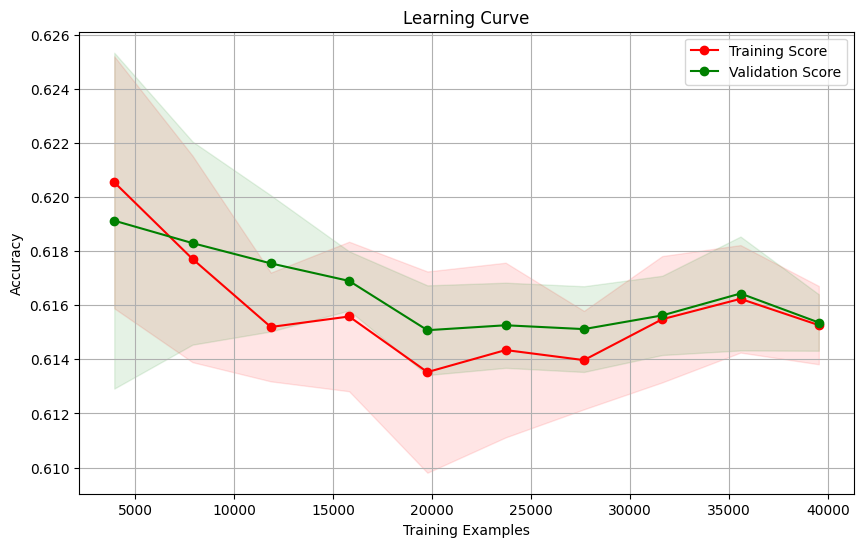

In [31]:
# Create a testing vs. validation curve
train_sizes, train_scores, valid_scores = learning_curve(
    gnb,X_train_selected, y_train, cv=5, scoring='accuracy', shuffle=True,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Validation Score")

plt.legend(loc="best")
plt.show()


### Bernoulli Naive Bayes

In [28]:

# Gaussian Naive Bayes
gnb = BernoulliNB()

# Training on selected features
gnb.fit(X_train_selected, y_train)

# Predictions on the training set
train_preds = gnb.predict(X_train_selected)

# Predictions on the validation set
val_preds = gnb.predict(X_valid_selected)

# Predictions on the test set
test_preds = gnb.predict(X_test_selected)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Confusion matrices
train_cm = confusion_matrix(y_train, train_preds)
val_cm = confusion_matrix(y_val, val_preds)
test_cm = confusion_matrix(y_test, test_preds)

# Classification reports
train_classification_report = classification_report(y_train, train_preds)
val_classification_report = classification_report(y_val, val_preds)
test_classification_report = classification_report(y_test, test_preds)

# Print scores and reports
print("Training Accuracy (Bernoulli NB):", train_accuracy)
print("Validation Accuracy (Bernoulli NB):", val_accuracy)
print("Testing Accuracy (Bernoulli NB):", test_accuracy)

print("\nConfusion Matrix (Training - Bernoulli NB):\n", train_cm)
print("\nConfusion Matrix (Validation - Bernoulli NB):\n", val_cm)
print("\nConfusion Matrix (Testing - Bernoulli NB):\n", test_cm)

print("\nClassification Report (Training - Bernoulli NB):\n", train_classification_report)
print("\nClassification Report (Validation - Bernoulli NB):\n", val_classification_report)
print("\nClassification Report (Testing - Bernoulli NB):\n", test_classification_report)


Training Accuracy (Bernoulli NB): 0.8173429120712334
Validation Accuracy (Bernoulli NB): 0.8142796430089247
Testing Accuracy (Bernoulli NB): 0.8161473087818697

Confusion Matrix (Training - Bernoulli NB):
 [[19769  2504]
 [ 6522 20620]]

Confusion Matrix (Validation - Bernoulli NB):
 [[5659  785]
 [1837 5837]]

Confusion Matrix (Testing - Bernoulli NB):
 [[2810  347]
 [ 951 2952]]

Classification Report (Training - Bernoulli NB):
               precision    recall  f1-score   support

           0       0.75      0.89      0.81     22273
           1       0.89      0.76      0.82     27142

    accuracy                           0.82     49415
   macro avg       0.82      0.82      0.82     49415
weighted avg       0.83      0.82      0.82     49415


Classification Report (Validation - Bernoulli NB):
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      6444
           1       0.88      0.76      0.82      7674

    accuracy         

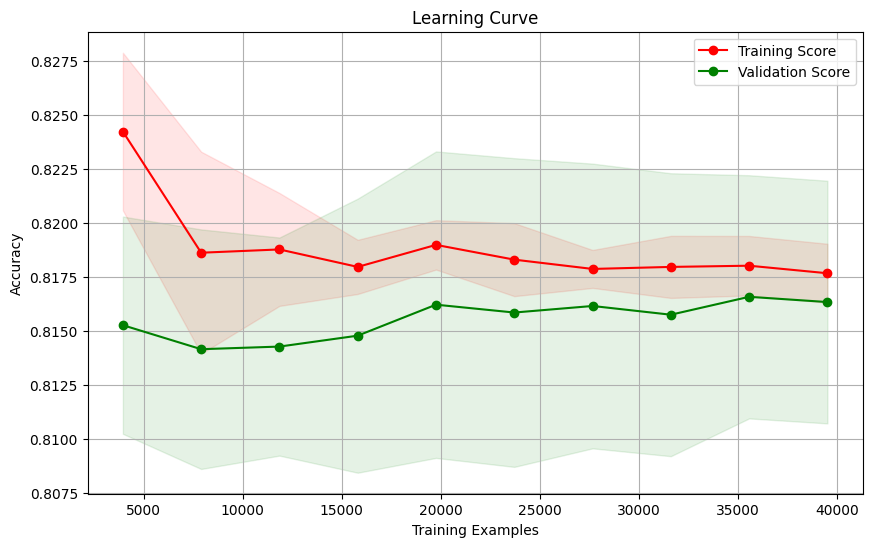

In [29]:
# Create a testing vs. validation curve
train_sizes, train_scores, valid_scores = learning_curve(
    gnb,X_train_selected, y_train, cv=5, scoring='accuracy', shuffle=True,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Validation Score")

plt.legend(loc="best")
plt.show()
